In [7]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
from torch import nn, optim
from sklearn.metrics import accuracy_score

root_dir = './'
# Define the tensor transformation and load training and validation data
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,),)
    ]
)
trainset = datasets.MNIST(
    root=root_dir,
    download=True,
    train=True,
    transform=transform
)
valset = datasets.MNIST(
    root=root_dir,
    download=True,
    train=False,
    transform=transform
)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [8]:
# We'll build another multy-layer perceptron, with 784 input units (images are 28x28)
# Can you guess the rest of the architecture?
model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 10)
)

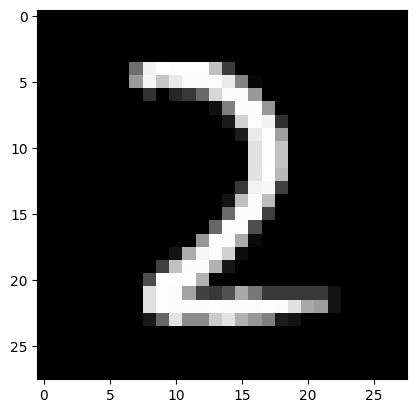

In [9]:
# Inspect the data whenever you can
images, labels = next(iter(trainloader))
pixels = images[0][0]
plt.imshow(pixels, cmap='gray')
plt.show()

In [10]:
# Let's define a loss function!
# We'll use cross-entropy, as we want the error in PD for all labels - again, Adam
# optimizer
criterion = nn.CrossEntropyLoss()
images = images.view(images.shape[0], -1)
output = model(images)
loss = criterion(output, labels)
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [12]:
# Let's start the training proper
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        # This is back-propagation explicitly being invoked!
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {:.2f} %".format(e, running_loss/len(trainloader) * 100))

Epoch 0 - Training loss: 10.261983569832578
Epoch 1 - Training loss: 9.788969045217986
Epoch 2 - Training loss: 9.202576841094665
Epoch 3 - Training loss: 9.01529350819916
Epoch 4 - Training loss: 8.311765178998828
Epoch 5 - Training loss: 8.071117483224393
Epoch 6 - Training loss: 7.9843048911431485
Epoch 7 - Training loss: 7.314019673752156
Epoch 8 - Training loss: 7.353477425118565
Epoch 9 - Training loss: 7.0058481124386605
Epoch 10 - Training loss: 6.838422009356762
Epoch 11 - Training loss: 6.616815091188956
Epoch 12 - Training loss: 6.552917083046698
Epoch 13 - Training loss: 6.20704506094362
Epoch 14 - Training loss: 6.317858502659987


In [13]:
# Let's finally test the accuracy of the validation data
valloader = torch.utils.data.DataLoader(
    valset,
    batch_size=valset.data.shape[0],
    shuffle=True
)
val_images, val_labels = next(iter(valloader))
val_images = val_images.view(val_images.shape[0], -1)
predictions = model (val_images)
predicted_labels = np.argmax(predictions.detach().numpy(), axis=1)
accuracy_score(val_labels.detach().numpy(), predicted_labels)

0.9659

In [ ]:
# Let's save this model too
torch.save(model, '../models/torchpy_mnist_model.pt')

RuntimeError: Parent directory ./models does not exist.